# Technical Proof Model Analyst : Ejercicio \#6 

In [1]:
%matplotlib inline


# Librerías y paquetes necesarios


#Trtamiento de datos

import pandas as pd
import numpy as np
import datetime as dt


#  Biblioteca para Regresión Lineal

from sklearn.linear_model import LinearRegression

#Graficas estáticas

import matplotlib
import matplotlib.pyplot as plt

#Graficas interactivas

import plotly
plotly.io.renderers.default = 'notebook_connected'
import plotly.express as px
import plotly.graph_objects as go

In [2]:
# Carga del conjunto de datos

path= './query1_sabana.csv'
df = pd.read_csv(path)


df.head(5)

,DATE,VALUE,GRUPO,REGION_NAME,DET_1
0,2016-05-01 00:00:00.0000000,363.0,MERCADO CEMENTO DEPTO CANAL,Amazonas,OTROS
1,2016-05-01 00:00:00.0000000,363.0,MERCADO CEMENTO DEPTO CANAL,Antioquia,OTROS
2,2016-05-01 00:00:00.0000000,363.0,MERCADO CEMENTO DEPTO CANAL,Arauca,OTROS
3,2016-05-01 00:00:00.0000000,363.0,MERCADO CEMENTO DEPTO CANAL,"Archipiélago de San Andrés, Providencia y Sant...",OTROS
4,2016-05-01 00:00:00.0000000,363.0,MERCADO CEMENTO DEPTO CANAL,Atlántico,OTROS


In [3]:
df.shape

(1241510, 5)

In [4]:
df.describe()

,VALUE
count,1.241510e+06
mean,1.737189e+04
std,3.880905e+04
min,-6.000000e+00
25%,7.990000e+02
50%,4.358000e+03
75%,1.665300e+04
max,1.015138e+06


In [5]:
df.duplicated().sum() 

0

In [6]:
df.isnull().sum()

DATE            0
VALUE           0
GRUPO           0
REGION_NAME     0
DET_1          68
dtype: int64

In [7]:
df['REGION_NAME'].value_counts()

Atlántico                                                   36515
Vichada                                                     36515
Cundinamarca                                                36515
Caquetá                                                     36515
Bogotá, D.C.                                                36515
Archipiélago de San Andrés, Providencia y Santa Catalina    36515
Santander                                                   36515
Meta                                                        36515
Boyacá                                                      36515
Bolívar                                                     36515
Córdoba                                                     36515
Guaviare                                                    36515
La Guajira                                                  36515
Resto                                                       36515
Sucre                                                       36515
Amazonas  

In [8]:
df['GRUPO'].value_counts()

LICENCIAS DEST DEPTO                     561748
MERCADO CEMENTO DEPTO CANAL              325108
MERCADO READY MIX                        174386
LICENCIAS                                159596
INDICE PRECIOS VIVIENDA NUEVA              9418
MERCADO CEMENTO DEPTO EMPAQUE              9078
INDICE PRECIOS VIVIENDA USADA (ANUAL)      2108
IMPORT - GRAY CEMENT                         68
Name: GRUPO, dtype: int64

In [9]:
df['DET_1'].value_counts()

OTROS                           118830
Total                            89760
Vivienda                         89726
No VIS                           89658
Comercio                         87754
CONCRETERAS                      81396
COMERCIALIZACION                 81396
CONSTRUCTORES Y CONTRATISTAS     81362
VIS                              69938
Educación                        49402
EDIFICACIONES                    45526
OBRAS CIVILES                    45492
VIVIENDA                         45492
Bodega                           42432
Oficina                          37264
Hotel                            33082
Hospital                         32062
Industria                        24956
Social                           24106
Religioso                        22712
Administración pública           16422
Otro                             12070
AU                                6290
EMPACADO                          4556
GRANEL                            4522
AM                       

Lo valores en cada departamento se repiten en una sola fecha, es decir, el 1 de enero esta amazona, antioquia, etc. El 2 de enero estarán los mismos departamentos amazonas, antioquia, etc. Además, cada departamento y fecha que se repiten tienen la misma cantidad en la columna llamada "VALUE".

## PIB en Colombia 

In [10]:
# Por lo dicho en el texto anterior hago extracción de valores únicos teniendo 
# como referncia la Fecha del dataset.

df_u1=df.copy()

df_u2=df_u1[['DATE', 'VALUE']]

#df_u2.head(5)

#df_u2.duplicated().sum() 

df_u2 = df_u2.drop_duplicates(subset=['DATE'])

df_u2.shape

(159, 2)

In [11]:
df_pib_Fecha=df_u2.groupby('DATE').agg({ 'VALUE': 'sum'
   
                              })

df_pib_Fecha=df_pib_Fecha.reset_index()

df_pib_Fecha.head(5)

#df_pib_Fecha.describe()


,DATE,VALUE
0,2010-01-01 00:00:00.0000000,24331.0
1,2010-01-31 00:00:00.0000000,4.0
2,2010-02-01 00:00:00.0000000,383.0
3,2010-03-01 00:00:00.0000000,69.0
4,2010-04-01 00:00:00.0000000,167.0


In [12]:
# Serie de tiempo para el PIB total

fig = px.line(df_pib_Fecha, x='DATE', y='VALUE', title='Comportamiento del comercio en el tiempo',
             labels={
                     "DATE": "Fecha",
                     "VALUE": "Valor"
                 })

fig.update_xaxes(rangeslider_visible=True,   rangeselector=dict(
        buttons=list([
            dict(count=1, label="Días", step="month", stepmode="backward"),
            dict(count=6, label="Seis meses", step="month", stepmode="backward"),
            dict(count=1, label="Año", step="year", stepmode="backward"),
            dict(step="all")
        ])))
fig.show()

In [13]:
df_pib_Grupo=df.groupby('GRUPO').agg({ 'VALUE': 'count'
   
                              })

df_pib_Grupo=df_pib_Grupo.reset_index()

df_pib_Grupo.head(5)

,GRUPO,VALUE
0,IMPORT - GRAY CEMENT,68
1,INDICE PRECIOS VIVIENDA NUEVA,9418
2,INDICE PRECIOS VIVIENDA USADA (ANUAL),2108
3,LICENCIAS,159596
4,LICENCIAS DEST DEPTO,561748


In [14]:
# Barras PIB por grupo

fig = px.bar(df_pib_Grupo, x="GRUPO", y="VALUE", barmode="group", height=400, labels={
                     "GRUPO": "Grupo",
                     "VALUE": "Valor"
                 })
fig.update_layout(title_text="Comportamienot del comercio por indicador", plot_bgcolor='rgb(230, 230, 230)')

fig.show()

In [15]:
df_pib_det=df.groupby('DET_1').agg({ 'VALUE': 'count'
   
                              })

df_pib_det=df_pib_det.reset_index()

df_pib_det.head(5)

,DET_1,VALUE
0,AM,3128
1,AU,6290
2,Administración pública,16422
3,Bodega,42432
4,COMERCIALIZACION,81396


In [16]:
# Barras PIB por det_1

fig = px.bar(df_pib_det, x="DET_1", y="VALUE", barmode="group", height=400, labels={
                     "DET_1": "Segmento",
                     "VALUE": "Valor"
                 })
fig.update_layout(title_text="Comportamiento del comercio por segmento", plot_bgcolor='rgb(230, 230, 230)')

fig.show()

## Antioquia con indicador MERCADO CEMENTO DEPTO CANAL.

In [17]:
# Filtrado region e indicador

df1=df.copy()

df11=df1['REGION_NAME']=='Antioquia'

df111 = df1[df11]


dff=df111['GRUPO']=='MERCADO CEMENTO DEPTO CANAL'

df2 = df111[dff]



df2.head(5)


,DATE,VALUE,GRUPO,REGION_NAME,DET_1
1,2016-05-01 00:00:00.0000000,363.0,MERCADO CEMENTO DEPTO CANAL,Antioquia,OTROS
69,2016-02-01 00:00:00.0000000,82342.0,MERCADO CEMENTO DEPTO CANAL,Antioquia,COMERCIALIZACION
103,2013-06-01 00:00:00.0000000,14315.0,MERCADO CEMENTO DEPTO CANAL,Antioquia,CONSTRUCTORES Y CONTRATISTAS
137,2010-10-01 00:00:00.0000000,7425.0,MERCADO CEMENTO DEPTO CANAL,Antioquia,OTROS
171,2016-10-01 00:00:00.0000000,4769.0,MERCADO CEMENTO DEPTO CANAL,Antioquia,CONSTRUCTORES Y CONTRATISTAS


In [18]:
df2.duplicated().sum() 

0

In [19]:
df2.describe()

,VALUE
count,9562.000000
mean,11220.416545
std,14139.310909
min,0.000000
25%,2031.000000
50%,5843.500000
75%,15010.250000
max,92181.000000


In [20]:
df2_pib_det=df2.groupby('DET_1').agg({ 'VALUE': 'sum'
   
                              })

df2_pib_det=df2_pib_det.reset_index()

df2_pib_det.head(5)

,DET_1,VALUE
0,COMERCIALIZACION,57594179.0
1,CONCRETERAS,23876580.0
2,CONSTRUCTORES Y CONTRATISTAS,20229756.0
3,OTROS,5589108.0


In [21]:
# Barras PIB por det_1

fig = px.bar(df2_pib_det, x="DET_1", y="VALUE", barmode="group", height=400,
             labels={
                     "DET_1": "Segmento",
                     "VALUE": "Valor"
             })
fig.update_layout(title_text="'Comportamiento del comercio por segmento en Antioquia con indicador específico'", plot_bgcolor='rgb(230, 230, 230)')

fig.show()

In [22]:
df3=df2.copy()


df3_seg=df3['DET_1']=='COMERCIALIZACION'

df3_seg2 = df3[df3_seg]


#df3_seg2.shape
df3_seg2.head(5)

,DATE,VALUE,GRUPO,REGION_NAME,DET_1
69,2016-02-01 00:00:00.0000000,82342.0,MERCADO CEMENTO DEPTO CANAL,Antioquia,COMERCIALIZACION
341,2011-05-01 00:00:00.0000000,18152.0,MERCADO CEMENTO DEPTO CANAL,Antioquia,COMERCIALIZACION
511,2018-08-01 00:00:00.0000000,16017.0,MERCADO CEMENTO DEPTO CANAL,Antioquia,COMERCIALIZACION
885,2013-01-01 00:00:00.0000000,34194.0,MERCADO CEMENTO DEPTO CANAL,Antioquia,COMERCIALIZACION
1191,2015-04-01 00:00:00.0000000,17718.0,MERCADO CEMENTO DEPTO CANAL,Antioquia,COMERCIALIZACION


In [23]:
df3_seg_Fecha=df3_seg2.groupby('DATE').agg({ 'VALUE': 'sum'
   
                              })

df3_seg_Fecha=df3_seg_Fecha.reset_index()

df3_seg_Fecha.head(5)

,DATE,VALUE
0,2010-01-01 00:00:00.0000000,414466.0
1,2010-02-01 00:00:00.0000000,436450.0
2,2010-03-01 00:00:00.0000000,461843.0
3,2010-04-01 00:00:00.0000000,418504.0
4,2010-05-01 00:00:00.0000000,468039.0


In [24]:
# Serie de tiempo para por segmento en Antioquia

fig = px.line(df3_seg_Fecha, x='DATE', y='VALUE', 
              title='Comportamiento del comercio por segmento en Antioquia con indicador específico',
             labels={
                     "DATE": "Fecha",
                     "VALUE": "Valor"
                 })

fig.update_xaxes(rangeslider_visible=True,   rangeselector=dict(
        buttons=list([
            dict(count=1, label="Días", step="month", stepmode="backward"),
            dict(count=6, label="Seis meses", step="month", stepmode="backward"),
            dict(count=1, label="Año", step="year", stepmode="backward"),
            dict(step="all")
        ])))
fig.show()

## Regresión lineal

In [25]:
df_LR=df2.copy()
df_LR['DATE'] = pd.to_datetime(df_LR['DATE'])
df_LR['DATE']=df_LR['DATE'].map(dt.datetime.toordinal)

df_LR.head(5)

,DATE,VALUE,GRUPO,REGION_NAME,DET_1
1,736085,363.0,MERCADO CEMENTO DEPTO CANAL,Antioquia,OTROS
69,735995,82342.0,MERCADO CEMENTO DEPTO CANAL,Antioquia,COMERCIALIZACION
103,735020,14315.0,MERCADO CEMENTO DEPTO CANAL,Antioquia,CONSTRUCTORES Y CONTRATISTAS
137,734046,7425.0,MERCADO CEMENTO DEPTO CANAL,Antioquia,OTROS
171,736238,4769.0,MERCADO CEMENTO DEPTO CANAL,Antioquia,CONSTRUCTORES Y CONTRATISTAS


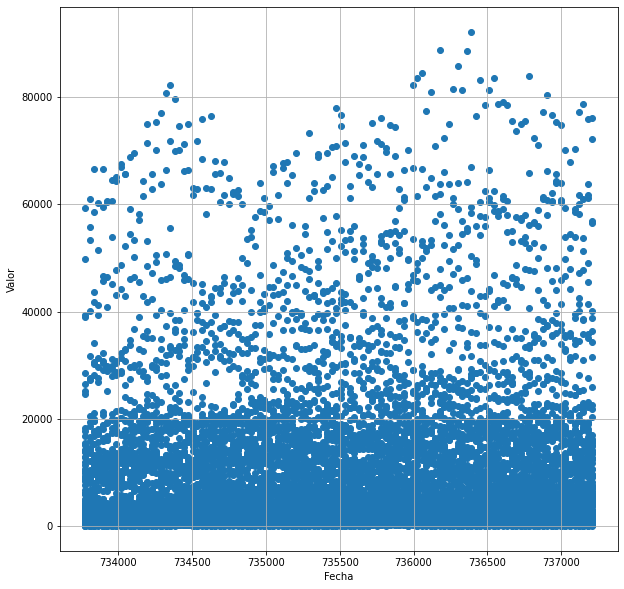

In [26]:
fig=plt.figure(figsize=(10,10))
plt.scatter(df_LR['DATE'],df_LR['VALUE'])
#plt.plot(df_LR['DATE'],df_LR['VALUE'])
plt.xlabel('Fecha')
plt.ylabel('Valor')
plt.grid()

Los puntos estan bastante dispersos y concentrados en los valores entre cero y 200.000

In [27]:
nVAL = df_LR['VALUE'].values.reshape(-1,1)
nDATE = df_LR['DATE'].values.reshape(-1,1)

In [28]:
linear_regressor = LinearRegression()
linear_regressor.fit(nDATE, nVAL)
val_pred = linear_regressor.predict(nVAL)
val_pred

array([[-699336.33463499],
       [-620097.56517648],
       [-685850.69426996],
       ...,
       [-686120.3684143 ],
       [-696953.72973965],
       [-694244.42283432]])

In [29]:
# Ecuación regresión lineal y=mx+b
m = linear_regressor.coef_[0][0]
b = linear_regressor.intercept_[0]
label = r'$Valor = %0.4f*Fecha %+0.4f$'%(m,b)
print(label)

$Valor = 0.9666*Fecha -699687.2010$


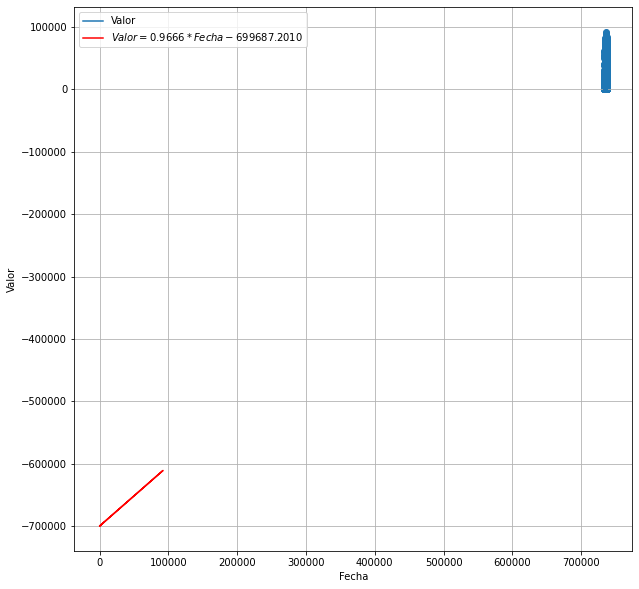

In [30]:
fig = plt.figure(figsize=(10,10))
plt.scatter(df_LR['DATE'],df_LR['VALUE'])
plt.plot(df_LR['DATE'],df_LR['VALUE'], label='Valor')
plt.plot(nVAL, val_pred, color='red', label=label)
plt.xlabel('Fecha')
plt.ylabel('Valor')
plt.legend()
plt.grid()

In [31]:
# Representación para diciembre y realizar la predicción para 

dic=['2019-12-01 00:00:00.0000000', '2019-12-02 00:00:00.0000000', '2019-12-03 00:00:00.0000000',
                   '2019-12-04 00:00:00.0000000', '2019-12-05 00:00:00.0000000','2019-12-06 00:00:00.0000000',
                   '2019-12-07 00:00:00.0000000','2019-12-08 00:00:00.0000000','2019-12-09 00:00:00.0000000',
                   '2019-12-10 00:00:00.0000000','2019-12-11 00:00:00.0000000','2019-12-12 00:00:00.0000000',
                   '2019-12-13 00:00:00.0000000','2019-12-14 00:00:00.0000000','2019-12-15 00:00:00.0000000',
                   '2019-12-16 00:00:00.0000000','2019-12-17 00:00:00.0000000','2019-12-18 00:00:00.0000000',
                   '2019-12-19 00:00:00.0000000','2019-12-20 00:00:00.0000000','2019-12-21 00:00:00.0000000',
                   '2019-12-22 00:00:00.0000000','2019-12-23 00:00:00.0000000','2019-12-24 00:00:00.0000000',
                   '2019-12-25 00:00:00.0000000','2019-12-26 00:00:00.0000000','2019-12-27 00:00:00.0000000',
                   '2019-12-28 00:00:00.0000000','2019-12-29 00:00:00.0000000','2019-12-30 00:00:00.0000000',
                   '2019-12-31 00:00:00.0000000']

df_dic=pd.DataFrame(dic,columns=['Mes'])

df_dic['Mes'] = pd.to_datetime(df_dic['Mes'])
df_dic['Mes']=df_dic['Mes'].map(dt.datetime.toordinal)

df_dic.tail(5)

,Mes
26,737420
27,737421
28,737422
29,737423
30,737424


In [32]:
Valor_diciembre=0.9666*df_dic-699687.2010

Valor_diciembre = Valor_diciembre.rename(columns={'Mes':'Predicción ventas para diciembre'})

Valor_diciembre.head(5)

,Predicción ventas para diciembre
0,13077.8394
1,13078.8060
2,13079.7726
3,13080.7392
4,13081.7058


In [33]:
dic2=pd.DataFrame(dic,columns=['Mes'])

vent_dic=pd.concat([dic2, Valor_diciembre], axis=1)

vent_dic.head(5)

,Mes,Predicción ventas para diciembre
0,2019-12-01 00:00:00.0000000,13077.8394
1,2019-12-02 00:00:00.0000000,13078.8060
2,2019-12-03 00:00:00.0000000,13079.7726
3,2019-12-04 00:00:00.0000000,13080.7392
4,2019-12-05 00:00:00.0000000,13081.7058


In [34]:
# Predicción de ventas para Diciembre 2019

fig = px.line(vent_dic, x='Mes', y='Predicción ventas para diciembre', 
              title='Predicción de ventas para Diciembre 2019',
             labels={
                     "Mes": "Fecha",
                     "Predicción ventas para diciembre": "Predicción ventas"
                 })

fig.show()

# Dependencias

In [1]:
%load_ext watermark

%watermark -v -m -p wget,pandas,numpy,datetime,plotly,scikit-learn,matplotlib,watermark

#Fecha

print(" ")

%watermark -u -n -t -z

Python implementation: CPython
Python version       : 3.8.5
IPython version      : 7.13.0

wget        : not installed
pandas      : 1.2.3
numpy       : 1.18.4
datetime    : unknown
plotly      : 4.14.3
scikit-learn: 0.23.1
matplotlib  : 3.2.1
watermark   : 2.2.0

Compiler    : GCC 9.3.0
OS          : Linux
Release     : 5.8.0-44-generic
Machine     : x86_64
Processor   : x86_64
CPU cores   : 8
Architecture: 64bit

 
Last updated: Sun Mar 14 2021 21:20:37-05

